## 作業
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras
from keras.datasets import cifar10
import warnings
warnings.filterwarnings('ignore')

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()

# 用 Keras 內建方法檢視模型各層參數量
model.summary()
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 5s 20ms/step - loss: 2.2786 - accuracy: 0.1537 - val_loss: 2.2397 - val_accuracy: 0.1909
Epoch 2/500
196/196 [==============================] - 3s 17ms/step - loss: 2.2157 - accuracy: 0.2162 - val_loss: 2.1901 - val_accuracy: 0.2352
Epoch 3/500
196/196 [==============================] - 4s 19ms/step - loss: 2.1689 - accuracy: 0.2520 - val_loss: 2.1463 - val_accuracy: 0.2572
Epoch 4/500
196/196 [==============================] - 4s 19ms/step - loss: 2.1262 - accuracy: 0.2697 - val_loss: 2.1046 - val_accuracy: 0.2813
Epoch 5/500
196/196 [==============================] - 4s 20ms/step - loss: 2.0860 - accuracy: 0.2837 - val_loss: 2.0666 - val_accuracy: 0.2941
Epoch 6/500
196/196 [==============================] - 4s 21ms/step - loss: 2.0496 - accuracy: 0.2951 - val_loss: 2.0329 - val_accuracy: 0.3021
Epoch 7/500
196/196 [==============================] - 4s 19ms/step - loss: 2.0180 - accuracy: 0.3035 - val_loss: 2.0042 - val_accuracy:

196/196 [==============================] - 7s 35ms/step - loss: 1.6727 - accuracy: 0.4177 - val_loss: 1.6779 - val_accuracy: 0.4126
Epoch 58/500
196/196 [==============================] - 7s 34ms/step - loss: 1.6698 - accuracy: 0.4188 - val_loss: 1.6741 - val_accuracy: 0.4170
Epoch 59/500
196/196 [==============================] - 6s 33ms/step - loss: 1.6667 - accuracy: 0.4209 - val_loss: 1.6754 - val_accuracy: 0.4135
Epoch 60/500
196/196 [==============================] - 7s 35ms/step - loss: 1.6639 - accuracy: 0.4214 - val_loss: 1.6683 - val_accuracy: 0.4174
Epoch 61/500
196/196 [==============================] - 7s 33ms/step - loss: 1.6607 - accuracy: 0.4226 - val_loss: 1.6670 - val_accuracy: 0.4160
Epoch 62/500
196/196 [==============================] - 5s 28ms/step - loss: 1.6578 - accuracy: 0.4233 - val_loss: 1.6632 - val_accuracy: 0.4174
Epoch 63/500
196/196 [==============================] - 4s 22ms/step - loss: 1.6552 - accuracy: 0.4242 - val_loss: 1.6599 - val_accuracy: 0.419

196/196 [==============================] - 4s 21ms/step - loss: 1.5375 - accuracy: 0.4647 - val_loss: 1.5565 - val_accuracy: 0.4545
Epoch 114/500
196/196 [==============================] - 4s 21ms/step - loss: 1.5353 - accuracy: 0.4654 - val_loss: 1.5558 - val_accuracy: 0.4531
Epoch 115/500
196/196 [==============================] - 5s 24ms/step - loss: 1.5335 - accuracy: 0.4661 - val_loss: 1.5556 - val_accuracy: 0.4555
Epoch 116/500
196/196 [==============================] - 5s 23ms/step - loss: 1.5315 - accuracy: 0.4681 - val_loss: 1.5541 - val_accuracy: 0.4588
Epoch 117/500
196/196 [==============================] - 4s 20ms/step - loss: 1.5298 - accuracy: 0.4682 - val_loss: 1.5530 - val_accuracy: 0.4575
Epoch 118/500
196/196 [==============================] - 4s 20ms/step - loss: 1.5277 - accuracy: 0.4688 - val_loss: 1.5518 - val_accuracy: 0.4536
Epoch 119/500
196/196 [==============================] - 4s 20ms/step - loss: 1.5260 - accuracy: 0.4686 - val_loss: 1.5517 - val_accuracy:

196/196 [==============================] - 5s 23ms/step - loss: 1.4435 - accuracy: 0.4979 - val_loss: 1.4883 - val_accuracy: 0.4773
Epoch 170/500
196/196 [==============================] - 5s 24ms/step - loss: 1.4413 - accuracy: 0.4989 - val_loss: 1.4886 - val_accuracy: 0.4734
Epoch 171/500
196/196 [==============================] - 4s 20ms/step - loss: 1.4403 - accuracy: 0.4994 - val_loss: 1.4825 - val_accuracy: 0.4810
Epoch 172/500
196/196 [==============================] - 4s 21ms/step - loss: 1.4383 - accuracy: 0.4995 - val_loss: 1.4861 - val_accuracy: 0.4738
Epoch 173/500
196/196 [==============================] - 4s 20ms/step - loss: 1.4374 - accuracy: 0.5006 - val_loss: 1.4807 - val_accuracy: 0.4818
Epoch 174/500
196/196 [==============================] - 4s 21ms/step - loss: 1.4361 - accuracy: 0.5003 - val_loss: 1.4866 - val_accuracy: 0.4778
Epoch 175/500
196/196 [==============================] - 4s 20ms/step - loss: 1.4340 - accuracy: 0.5007 - val_loss: 1.4805 - val_accuracy:

196/196 [==============================] - 4s 21ms/step - loss: 1.3642 - accuracy: 0.5244 - val_loss: 1.4347 - val_accuracy: 0.4968
Epoch 226/500
196/196 [==============================] - 4s 21ms/step - loss: 1.3626 - accuracy: 0.5263 - val_loss: 1.4352 - val_accuracy: 0.4944
Epoch 227/500
196/196 [==============================] - 4s 21ms/step - loss: 1.3618 - accuracy: 0.5257 - val_loss: 1.4334 - val_accuracy: 0.4950
Epoch 228/500
196/196 [==============================] - 4s 21ms/step - loss: 1.3607 - accuracy: 0.5264 - val_loss: 1.4352 - val_accuracy: 0.4972
Epoch 229/500
196/196 [==============================] - 4s 21ms/step - loss: 1.3588 - accuracy: 0.5252 - val_loss: 1.4356 - val_accuracy: 0.4930
Epoch 230/500
196/196 [==============================] - 4s 21ms/step - loss: 1.3577 - accuracy: 0.5267 - val_loss: 1.4348 - val_accuracy: 0.4943
Epoch 231/500
196/196 [==============================] - 4s 21ms/step - loss: 1.3565 - accuracy: 0.5267 - val_loss: 1.4374 - val_accuracy:

196/196 [==============================] - 4s 21ms/step - loss: 1.2953 - accuracy: 0.5477 - val_loss: 1.4021 - val_accuracy: 0.5033
Epoch 282/500
196/196 [==============================] - 4s 21ms/step - loss: 1.2938 - accuracy: 0.5480 - val_loss: 1.4042 - val_accuracy: 0.5029
Epoch 283/500
196/196 [==============================] - 4s 22ms/step - loss: 1.2922 - accuracy: 0.5492 - val_loss: 1.4090 - val_accuracy: 0.5051
Epoch 284/500
196/196 [==============================] - 4s 21ms/step - loss: 1.2909 - accuracy: 0.5482 - val_loss: 1.4045 - val_accuracy: 0.5021
Epoch 285/500
196/196 [==============================] - 4s 21ms/step - loss: 1.2905 - accuracy: 0.5498 - val_loss: 1.3955 - val_accuracy: 0.5060
Epoch 286/500
196/196 [==============================] - 4s 22ms/step - loss: 1.2893 - accuracy: 0.5483 - val_loss: 1.3938 - val_accuracy: 0.5079
Epoch 287/500
196/196 [==============================] - 4s 21ms/step - loss: 1.2880 - accuracy: 0.5502 - val_loss: 1.4041 - val_accuracy:

196/196 [==============================] - 5s 25ms/step - loss: 1.2325 - accuracy: 0.5686 - val_loss: 1.3732 - val_accuracy: 0.5128
Epoch 338/500
196/196 [==============================] - 5s 24ms/step - loss: 1.2312 - accuracy: 0.5706 - val_loss: 1.3683 - val_accuracy: 0.5167
Epoch 339/500
196/196 [==============================] - 4s 22ms/step - loss: 1.2301 - accuracy: 0.5707 - val_loss: 1.3699 - val_accuracy: 0.5171
Epoch 340/500
196/196 [==============================] - 4s 20ms/step - loss: 1.2286 - accuracy: 0.5720 - val_loss: 1.3830 - val_accuracy: 0.5109
Epoch 341/500
196/196 [==============================] - 4s 20ms/step - loss: 1.2273 - accuracy: 0.5719 - val_loss: 1.3741 - val_accuracy: 0.5090
Epoch 342/500
196/196 [==============================] - 4s 21ms/step - loss: 1.2273 - accuracy: 0.5706 - val_loss: 1.3851 - val_accuracy: 0.5077
Epoch 343/500
196/196 [==============================] - 4s 21ms/step - loss: 1.2256 - accuracy: 0.5719 - val_loss: 1.3936 - val_accuracy:

196/196 [==============================] - 4s 22ms/step - loss: 1.1723 - accuracy: 0.5914 - val_loss: 1.3542 - val_accuracy: 0.5189
Epoch 394/500
196/196 [==============================] - 4s 21ms/step - loss: 1.1703 - accuracy: 0.5917 - val_loss: 1.3709 - val_accuracy: 0.5137
Epoch 395/500
196/196 [==============================] - 4s 21ms/step - loss: 1.1713 - accuracy: 0.5915 - val_loss: 1.3505 - val_accuracy: 0.5206
Epoch 396/500
196/196 [==============================] - 4s 21ms/step - loss: 1.1694 - accuracy: 0.5916 - val_loss: 1.3604 - val_accuracy: 0.5198
Epoch 397/500
196/196 [==============================] - 4s 21ms/step - loss: 1.1685 - accuracy: 0.5926 - val_loss: 1.3674 - val_accuracy: 0.5151
Epoch 398/500
196/196 [==============================] - 4s 21ms/step - loss: 1.1657 - accuracy: 0.5950 - val_loss: 1.3730 - val_accuracy: 0.5174
Epoch 399/500
196/196 [==============================] - 4s 22ms/step - loss: 1.1656 - accuracy: 0.5927 - val_loss: 1.3626 - val_accuracy:

196/196 [==============================] - 4s 21ms/step - loss: 1.1152 - accuracy: 0.6108 - val_loss: 1.3429 - val_accuracy: 0.5282
Epoch 450/500
196/196 [==============================] - 4s 21ms/step - loss: 1.1136 - accuracy: 0.6114 - val_loss: 1.3850 - val_accuracy: 0.5138
Epoch 451/500
196/196 [==============================] - 4s 23ms/step - loss: 1.1136 - accuracy: 0.6127 - val_loss: 1.3835 - val_accuracy: 0.5173
Epoch 452/500
196/196 [==============================] - 5s 25ms/step - loss: 1.1106 - accuracy: 0.6137 - val_loss: 1.3587 - val_accuracy: 0.5203
Epoch 453/500
196/196 [==============================] - 5s 23ms/step - loss: 1.1106 - accuracy: 0.6133 - val_loss: 1.3490 - val_accuracy: 0.5244
Epoch 454/500
196/196 [==============================] - 5s 24ms/step - loss: 1.1105 - accuracy: 0.6134 - val_loss: 1.3583 - val_accuracy: 0.5190
Epoch 455/500
196/196 [==============================] - 4s 20ms/step - loss: 1.1083 - accuracy: 0.6148 - val_loss: 1.3701 - val_accuracy:

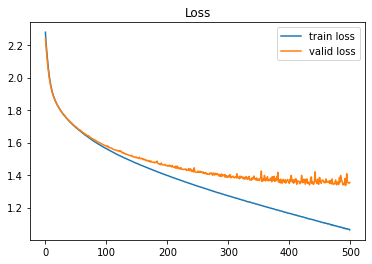

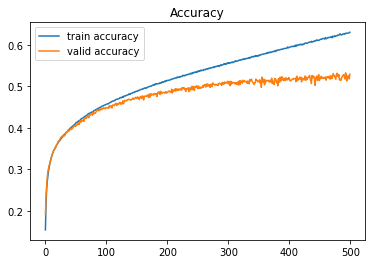

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()